# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [6]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn wordcloud python-mecab-ko wget transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ad4891b02f668fc564ab2b1363b7287b1f50378928c8b55afd1fb963bad69700
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae

### 1-2. 라이브러리 import

In [7]:
# 런타임 재시작 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,483 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120876 files and dire

In [1]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os

### 1-3. 한글 글꼴 설정

In [2]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [3]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [3]:
import scipy

In [4]:
data_path = '/content/drive/MyDrive/aivle_content_classification/'
x_train = scipy.sparse.load_npz(data_path + 'X_tfidf_train.npz').toarray()
x_test = scipy.sparse.load_npz(data_path + 'X_tfidf_val.npz').toarray()
y_train = np.load(data_path + 'y_train.npy')
y_test = np.load(data_path + 'y_val.npy')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2779, 9917), (927, 9917), (2779,), (927,))

In [5]:
w2v_x_train = np.load(data_path +'X_w2v_train.npy')
w2v_x_val = np.load(data_path +'X_w2v_val.npy')
w2v_x_train.shape, w2v_x_val.shape

((2779, 128), (927, 128))

In [6]:
seq_x_train = np.load(data_path+'X_mor_sequence_train.npy')
seq_x_val = np.load(data_path+'X_mor_sequence_val.npy')
seq_x_train.shape, seq_x_val.shape

((2779, 500), (927, 500))

## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

### 3-1. Model 1

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
%%time
model1 = LGBMClassifier(random_state=2023)
model1.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33497
[LightGBM] [Info] Number of data points in the train set: 2779, number of used features: 945
[LightGBM] [Info] Start training from score -0.845620
[LightGBM] [Info] Start training from score -1.614488
[LightGBM] [Info] Start training from score -1.651325
[LightGBM] [Info] Start training from score -1.863738
[LightGBM] [Info] Start training from score -3.695740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMClassifier(random_state=2023)

In [ ]:
y_pred = model1.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       392
           1       0.75      0.77      0.76       179
           2       0.76      0.67      0.71       195
           3       0.87      0.75      0.80       130
           4       0.97      0.97      0.97        31

    accuracy                           0.80       927
   macro avg       0.83      0.80      0.81       927
weighted avg       0.80      0.80      0.79       927

[[343  17  28   4   0]
 [ 32 137   8   1   1]
 [ 43  12 130  10   0]
 [ 12  15   6  97   0]
 [  0   1   0   0  30]]
79.50377562028046


In [ ]:
model1 = LGBMClassifier(random_state=2023)
model1.fit(w2v_x_train, y_train)

y_pred = model1.predict(w2v_x_val)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 2779, number of used features: 128
[LightGBM] [Info] Start training from score -0.845620
[LightGBM] [Info] Start training from score -1.614488
[LightGBM] [Info] Start training from score -1.651325
[LightGBM] [Info] Start training from score -1.863738
[LightGBM] [Info] Start training from score -3.695740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       392
           1       0.61      0.55      0.58       179
           2       0.56      0.50      0.53       195
           3       0.57      0.58      0.57       130
           4       0.64      0.23      0.33        31

    accuracy                        

### 3-2. Model 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
model2 = RandomForestClassifier(random_state=2023)
model2.fit(x_train, y_train)

CPU times: user 8.65 s, sys: 77.8 ms, total: 8.73 s
Wall time: 16.8 s


RandomForestClassifier(random_state=2023)

In [ ]:
y_pred = model2.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       392
           1       0.87      0.58      0.70       179
           2       0.77      0.58      0.66       195
           3       0.84      0.75      0.79       130
           4       1.00      0.71      0.83        31

    accuracy                           0.76       927
   macro avg       0.84      0.71      0.76       927
weighted avg       0.78      0.76      0.75       927

[[367   6  13   6   0]
 [ 61 104   9   5   0]
 [ 73   3 113   6   0]
 [ 16   5  11  98   0]
 [  4   2   1   2  22]]
75.94390507011866


In [ ]:
# word2vec
%%time
model2 = RandomForestClassifier(random_state=2023)
model2.fit(w2v_x_train, y_train)

y_pred = model2.predict(w2v_x_val)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       392
           1       0.57      0.46      0.51       179
           2       0.51      0.49      0.50       195
           3       0.51      0.55      0.53       130
           4       0.33      0.06      0.11        31

    accuracy                           0.61       927
   macro avg       0.53      0.47      0.48       927
weighted avg       0.60      0.61      0.60       927

CPU times: user 3.52 s, sys: 5.34 ms, total: 3.53 s
Wall time: 4.16 s


### 3-3. Model 3

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model4 = LogisticRegression()
model4.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model4.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       392
           1       0.86      0.81      0.83       179
           2       0.80      0.74      0.77       195
           3       0.89      0.78      0.83       130
           4       1.00      0.42      0.59        31

    accuracy                           0.83       927
   macro avg       0.87      0.74      0.78       927
weighted avg       0.83      0.83      0.82       927

[[365   2  22   3   0]
 [ 25 145   7   2   0]
 [ 42   5 144   4   0]
 [ 13   9   7 101   0]
 [  6   8   0   4  13]]
82.84789644012946


In [ ]:
# word2vec
%%time
model4 = LogisticRegression(random_state=2023)
model4.fit(w2v_x_train, y_train)

y_pred = model4.predict(w2v_x_val)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       392
           1       0.66      0.57      0.61       179
           2       0.66      0.58      0.62       195
           3       0.62      0.65      0.63       130
           4       0.62      0.32      0.43        31

    accuracy                           0.70       927
   macro avg       0.66      0.60      0.62       927
weighted avg       0.69      0.70      0.69       927

CPU times: user 543 ms, sys: 321 ms, total: 864 ms
Wall time: 685 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
model5 = MultinomialNB()
model5.fit(x_train, y_train)

MultinomialNB()

In [13]:
y_pred = model5.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       392
           1       0.91      0.39      0.54       179
           2       0.96      0.24      0.39       195
           3       0.92      0.45      0.60       130
           4       0.00      0.00      0.00        31

    accuracy                           0.61       927
   macro avg       0.66      0.41      0.44       927
weighted avg       0.73      0.61      0.56       927

[[392   0   0   0   0]
 [108  69   2   0   0]
 [146   1  47   1   0]
 [ 70   2   0  58   0]
 [ 23   4   0   4   0]]
61.057173678532905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.linear_model import SGDClassifier

In [14]:
model6 = SGDClassifier()
model6.fit(x_train, y_train)

SGDClassifier()

In [15]:
y_pred = model6.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       392
           1       0.86      0.85      0.86       179
           2       0.74      0.81      0.77       195
           3       0.90      0.78      0.84       130
           4       1.00      0.84      0.91        31

    accuracy                           0.84       927
   macro avg       0.87      0.83      0.85       927
weighted avg       0.85      0.84      0.85       927

[[346   7  36   3   0]
 [ 17 152   9   1   0]
 [ 27   6 157   5   0]
 [  9   8  11 102   0]
 [  0   3   0   2  26]]
84.46601941747572


In [17]:
# word2vec
%%time
model6 = SGDClassifier(random_state=2023)
model6.fit(w2v_x_train, y_train)

y_pred = model6.predict(w2v_x_val)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       392
           1       0.79      0.34      0.48       179
           2       0.51      0.79      0.62       195
           3       0.60      0.63      0.61       130
           4       0.68      0.42      0.52        31

    accuracy                           0.66       927
   macro avg       0.67      0.59      0.60       927
weighted avg       0.70      0.66      0.65       927

CPU times: user 344 ms, sys: 8.05 ms, total: 352 ms
Wall time: 394 ms


### 3-4. Hyperparameter Tuning(Optional)
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPool1D, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### 4-1. DNN

In [8]:
seq_x_train.shape

(2779, 500)

In [15]:
# 세션 클리어
clear_session()

# 모델 쌓기
il = Input(shape=(500, ))

hl = Dense(64, activation='swish')(il)
hl = Dense(128, activation='swish')(hl)
hl = Dense(256, activation='swish')(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 74693 (291.77 KB)
Trainable params: 74693 (291.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_test),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
87/87 [==============================] - 7s 7ms/step - loss: 42.6255 - accuracy: 0.3134 - val_loss: 18.7319 - val_accuracy: 0.3430
Epoch 2/1000
87/87 [==============================] - 0s 5ms/step - loss: 10.0164 - accuracy: 0.4289 - val_loss: 13.9338 - val_accuracy: 0.3323
Epoch 3/1000
87/87 [==============================] - 0s 4ms/step - loss: 5.0779 - accuracy: 0.5178 - val_loss: 11.9248 - val_accuracy: 0.2999
Epoch 4/1000
87/87 [==============================] - 0s 5ms/step - loss: 2.8751 - accuracy: 0.6017 - val_loss: 11.5372 - val_accuracy: 0.3625
Epoch 5/1000
87/87 [==============================] - 0s 5ms/step - loss: 1.8382 - accuracy: 0.6844 - val_loss: 11.3676 - val_accuracy: 0.3128
Epoch 6/1000
87/87 [==============================] - 0s 5ms/step - loss: 1.4803 - accuracy: 0.7132 - val_loss: 11.0714 - val_accuracy: 0.3269
Epoch 7/1000
87/87 [==============================] - 0s 5ms/step - loss: 0.9184 - accuracy: 0.7866 - val_loss: 10.7808 - val_accuracy: 0.34

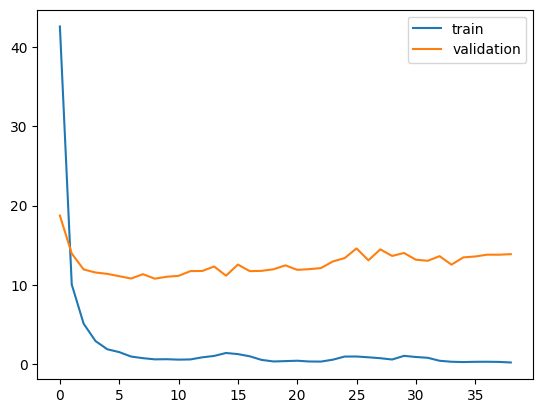

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

### 4-2. 1-D CNN

In [14]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
clear_session()

# 모델 쌓기
il = Input(shape=(500,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl) #가로로만 연산
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)
hl = Flatten()(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 64)           0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 128)          41088     
                                                             

In [ ]:
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_test),
                    epochs=10, callbacks=[es])

Epoch 1/1000
87/87 [==============================] - 90s 1s/step - loss: 1.0070 - accuracy: 0.5851 - val_loss: 0.9981 - val_accuracy: 0.5707
Epoch 2/1000
87/87 [==============================] - 86s 989ms/step - loss: 0.7217 - accuracy: 0.6970 - val_loss: 1.0432 - val_accuracy: 0.6009
Epoch 3/1000
87/87 [==============================] - 88s 1s/step - loss: 0.5524 - accuracy: 0.7816 - val_loss: 1.1132 - val_accuracy: 0.6300
Epoch 4/1000
87/87 [==============================] - 89s 1s/step - loss: 0.4260 - accuracy: 0.8384 - val_loss: 1.2585 - val_accuracy: 0.6548
Epoch 5/1000
87/87 [==============================] - 88s 1s/step - loss: 0.3391 - accuracy: 0.8791 - val_loss: 2.1107 - val_accuracy: 0.6321
Epoch 6/1000
87/87 [==============================] - 85s 982ms/step - loss: 0.3005 - accuracy: 0.8942 - val_loss: 2.3594 - val_accuracy: 0.6160
Epoch 7/1000
87/87 [==============================] - 90s 1s/step - loss: 0.2021 - accuracy: 0.9320 - val_loss: 2.4314 - val_accuracy: 0.6548


KeyboardInterrupt: ignored

In [12]:
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
# plt.legend()
# plt.show()

### 4-3. LSTM

In [ ]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
clear_session()

# 모델 쌓기
il = Input(shape=(500,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=False)(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 64)           0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 128)          41088     
                                                             

In [ ]:
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_test),
                    epochs=10, callbacks=[es])

Epoch 1/10
87/87 [==============================] - 76s 781ms/step - loss: 1.2388 - accuracy: 0.4642 - val_loss: 1.0953 - val_accuracy: 0.5189
Epoch 2/10
87/87 [==============================] - 65s 755ms/step - loss: 0.9278 - accuracy: 0.6204 - val_loss: 1.0206 - val_accuracy: 0.5868
Epoch 3/10
87/87 [==============================] - 66s 757ms/step - loss: 0.7231 - accuracy: 0.7280 - val_loss: 0.9340 - val_accuracy: 0.6386
Epoch 4/10
87/87 [==============================] - 66s 757ms/step - loss: 0.5799 - accuracy: 0.7837 - val_loss: 0.9885 - val_accuracy: 0.6354
Epoch 5/10
87/87 [==============================] - 66s 763ms/step - loss: 0.4685 - accuracy: 0.8366 - val_loss: 1.0607 - val_accuracy: 0.6505
Epoch 6/10
87/87 [==============================] - 68s 783ms/step - loss: 0.3489 - accuracy: 0.8773 - val_loss: 1.1869 - val_accuracy: 0.6451
Epoch 7/10
87/87 [==============================] - 74s 847ms/step - loss: 0.2864 - accuracy: 0.9036 - val_loss: 1.1270 - val_accuracy: 0.6688

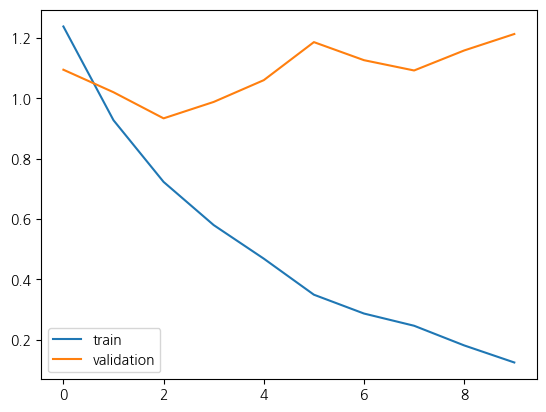

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)